# EDA Dataset Spaceship Titanic

## Descripción del Dataset

In [ ]:
PassengerId is a unique identifier for each passenger. Each identifier has the form gggg_pp, where gggg indicates the group with which the passenger is traveling, and pp is their number in the group. People in a group are often family members, but not always.

HomePlanet - the planet from which the passenger departed, usually the planet of his permanent residence.

CryoSleep - indicates whether the passenger has decided to go into suspended animation for the duration of the flight. Passengers in cryosleep are locked in their cabins.

Cabin - the number of the cabin in which the passenger is located. Takes the form deck/num/side, where side can be either P for port or S for starboard.

Destination - the planet on which the passenger will disembark.

Age - the age of the passenger.

VIP - whether the passenger has paid for a special VIP service during the flight.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Room service, Food court, shopping center, Spa, VRDeck - the amount that a passenger paid for each of the many luxurious amenities of the Titanic spacecraft.

Name - the passenger's first and last name.

Transported - whether the passenger was transported to another dimension. This is the goal, the column that you are trying to predict.


In [2]:
# importación de librarías

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Parámetros gráficos

params = {'figure.figsize' : (12,6),
         'font.size' : 12,
         'axes.titlesize' : 20,
         'axes.linewidth' : 2}


bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1,
        'alpha' : 1}

plt.style.use('fivethirtyeight')
color = ['#E36149', '#49AF72']
matplotlib.rcParams.update(params)

In [133]:
# Сountplot based on a one column

def countplot_one_column(name_column, title):
    c = sns.countplot(data = df_test,
                  x = name_column,
                  edgecolor = 'black',
                  linewidth = 1.5)
    plt.bar_label(c.containers[0], bbox = bbox)

    plt.title(title, fontweight = 'bold')
    plt.show()

In [131]:
# Сountplot based on multiple column

def countplot_hue_column(name_column, hue_column, title):
    c = sns.countplot(data = df_test,
                  x = name_column,
                  hue = hue_column,
                  linewidth = 1,
                  edgecolor = 'black',
                  palette = color)
    plt.bar_label(c.containers[0], bbox = bbox)
    plt.bar_label(c.containers[1], bbox = bbox)
    
    plt.title(title, fontweight = 'bold')
    plt.show()


In [16]:
# Conectando la base de datos

df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
# Verificar líneas x Columnas
df.shape

(8693, 14)

In [19]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Limpieza de los datos

In [22]:
# Eliminación de la columna Name
df.drop("Name", axis=1, inplace=True)

## Transformación de los datos

In [29]:
# preparando dos nuevas columnas a partir de PassegerId
Group = df['PassengerId'].str.split('_', expand=True)[0] 
NumberInGroup = df['PassengerId'].str.split('_', expand=True)[1]

# Renomeando PassagerId como Group
df['PassengerId'] = Group
df = df.rename(columns = {'PassengerId' : 'Group'})
# removing the extra 0
df['Group'] = df['Group'].astype('int')

# add NumberInGroup
insert_position = 1
df.insert(insert_position, 'NumberInGroup', NumberInGroup)
# removing the extra 1
df['NumberInGroup'] = df['NumberInGroup'].astype('int')



In [33]:
# crea nuevo dataset llamado count_group
count_group = df.groupby('Group').agg({'Group' : 'count'})
count_group.index.name = 'Group'
count_group = count_group.rename(columns = {'Group' : 'CountGroup'})

count_group.head(10)


,CountGroup
Group,
1,1
2,1
3,2
4,1
5,1
6,2
7,1
8,3
9,1


In [34]:
# Creating CountGroup - number of people in the group
df.insert(2, 'CountGroup', np.nan)

for index in count_group.index:
    df.loc[df['Group'] == index, 'CountGroup'] = \
    df.loc[df['Group'] == index, 'CountGroup'].fillna(count_group.loc[index][0])

df['CountGroup'] = df['CountGroup'].astype('int')

In [39]:
# Separar los elementos de Cabin
deck = df['Cabin'].str.split('/', expand = True)[0]
num = df['Cabin'].str.split('/', expand = True)[1]
side = df['Cabin'].str.split('/', expand = True)[2]

df['Cabin'] = deck
df = df.rename(columns = {'Cabin' : 'CabinType'})
df.insert(6, 'NumCabins', num)
df.insert(7, 'Side', side)


In [46]:
# Age
df['Age'].describe()

count    8693.000000
mean       28.790291
std        14.341404
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [47]:
# Inserir la edad median a los registros vacíos
median = df['Age'].median()
df.loc[df['Age'].isna(),'Age'] = df.loc[df['Age'].isna(),'Age'].fillna(median)

In [49]:
median = df['RoomService'].median()
df.loc[df['RoomService'].isna(), 'RoomService'] = df.loc[df['RoomService'].isna(), 'RoomService'].fillna(median)
df.loc[df['FoodCourt'].isna(), 'FoodCourt'] = df.loc[df['FoodCourt'].isna(), 'FoodCourt'].fillna(median)
df.loc[df['ShoppingMall'].isna(), 'ShoppingMall'] = df.loc[df['ShoppingMall'].isna(), 'ShoppingMall'].fillna(median)
df.loc[df['Spa'].isna(), 'Spa'] = df.loc[df['Spa'].isna(), 'Spa'].fillna(median)
df.loc[df['VRDeck'].isna(), 'VRDeck'] = df.loc[df['VRDeck'].isna(), 'VRDeck'].fillna(median)

In [159]:
df.loc[df['VIP'].isna(), 'VIP'] = df.loc[df['VIP'].isna(), 'VIP'].fillna(False)

def fillna_column(columns_nan, column_fill, value, fill):
    df.loc[(df[columns_nan].isna()) & (df[column_fill] == value), columns_nan] = \
    df.loc[(df[columns_nan].isna()) & (df[column_fill] == value), columns_nan].fillna(fill)

fillna_column('Destination', 'HomePlanet', 'Earth','TRAPPIST-1e')
fillna_column('Destination', 'HomePlanet', 'Europa', '55 Cancri e')




In [160]:
fillna_column('Destination', 'Transported', False,'TRAPPIST-1e')
fillna_column('Destination', 'Transported', True, '55 Cancri e')


In [62]:
fillna_column('Side', 'Transported', False, 'P')
fillna_column('Side', 'Transported', True, 'S')

In [80]:
df.loc[df['CabinType'].isna(), 'CabinType'] = df.loc[df['CabinType'].isna(), 'CabinType'].fillna("G")

In [81]:
# Obtén todos los tipos de cabinas únicos en tus datos
tipos_de_cabinas = df['CabinType'].unique()

# Imprime los tipos de cabinas únicos
print("Tipos de Cabinas existentes:")
for tipo in tipos_de_cabinas:
    print(tipo)
    

Tipos de Cabinas existentes:
B
F
A
G
E
D
C
T


In [83]:
fillna_column('HomePlanet', 'CabinType', 'B', 'Europa')
fillna_column('HomePlanet', 'CabinType', 'F', 'Earth')
fillna_column('HomePlanet', 'CabinType', 'A', 'Europa')
fillna_column('HomePlanet', 'CabinType', 'G', 'Earth')
fillna_column('HomePlanet', 'CabinType', 'E', 'Earth')
fillna_column('HomePlanet', 'CabinType', 'D', 'Mars')
fillna_column('HomePlanet', 'CabinType', 'C', 'Europa')
fillna_column('HomePlanet', 'CabinType', 'T', 'Europa')

In [84]:
fillna_column('CryoSleep', 'Transported', False, False)
fillna_column('CryoSleep', 'Transported', True, True)


In [86]:
df = df.drop('NumCabins' , axis = 1)

In [87]:
df.isna().sum()

Group            0
NumberInGroup    0
CountGroup       0
HomePlanet       0
CryoSleep        0
CabinType        0
Side             0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
dtype: int64

In [89]:
df.dtypes

Group              int32
NumberInGroup      int32
CountGroup         int32
HomePlanet        object
CryoSleep         object
CabinType         object
Side              object
Destination       object
Age              float64
VIP               object
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported         bool
dtype: object

In [96]:
#Ajustar tabla de test

df_test = pd.read_csv('test.csv')

df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# Preparación de la tabla de test

In [97]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [98]:
# Eliminación de la columna Name
df_test.drop("Name", axis=1, inplace=True)

### Preparacion de los datos

In [100]:
# preparando dos nuevas columnas a partir de PassegerId
Group = df_test['PassengerId'].str.split('_', expand=True)[0] 
NumberInGroup = df_test['PassengerId'].str.split('_', expand=True)[1]

# Renomeando PassagerId como Group
df_test['PassengerId'] = Group
df_test = df_test.rename(columns = {'PassengerId' : 'Group'})
# removing the extra 0
df_test['Group'] = df_test['Group'].astype('int')

# add NumberInGroup
insert_position = 1
df_test.insert(insert_position, 'NumberInGroup', NumberInGroup)
# removing the extra 1
df_test['NumberInGroup'] = df_test['NumberInGroup'].astype('int')



In [144]:
# crea nuevo dataset llamado count_group
count_group = df_test.groupby('Group').agg({'Group' : 'count'})
count_group.index.name = 'Group'
count_group = count_group.rename(columns = {'Group' : 'CountGroup'})

count_group.head()


,CountGroup
Group,
13,1
18,1
19,1
21,1
23,1


In [149]:
# Creating CountGroup - number of people in the group
df_test.insert(2, 'CountGroup', np.nan)

for index in count_group.index:
    df_test.loc[df_test['Group'] == index, 'CountGroup'] = \
    df_test.loc[df_test['Group'] == index, 'CountGroup'].fillna(count_group.loc[index][0])

df_test['CountGroup'] = df_test['CountGroup'].astype('int')

In [112]:
# Separar los elementos de Cabin
deck = df_test['Cabin'].str.split('/', expand = True)[0]
num = df_test['Cabin'].str.split('/', expand = True)[1]
side = df_test['Cabin'].str.split('/', expand = True)[2]

df_test['Cabin'] = deck
df_test = df_test.rename(columns = {'Cabin' : 'CabinType'})
df_test.insert(6, 'NumCabins', num)
df_test.insert(7, 'Side', side)


In [115]:
# Age
df_test['Age'].describe()

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [119]:
# Inserir la edad median a los registros vacíos
median = df_test['Age'].median()
df_test.loc[df_test['Age'].isna(),'Age'] = df_test.loc[df_test['Age'].isna(),'Age'].fillna(median)

In [128]:
median = df_test['RoomService'].median()
df_test.loc[df_test['RoomService'].isna(), 'RoomService'] = df_test.loc[df_test['RoomService'].isna(), 'RoomService'].fillna(median)
df_test.loc[df_test['FoodCourt'].isna(), 'FoodCourt'] = df_test.loc[df_test['FoodCourt'].isna(), 'FoodCourt'].fillna(median)
df_test.loc[df_test['ShoppingMall'].isna(), 'ShoppingMall'] = df_test.loc[df_test['ShoppingMall'].isna(), 'ShoppingMall'].fillna(median)
df_test.loc[df_test['Spa'].isna(), 'Spa'] = df_test.loc[df_test['Spa'].isna(), 'Spa'].fillna(median)
df_test.loc[df_test['VRDeck'].isna(), 'VRDeck'] = df_test.loc[df_test['VRDeck'].isna(), 'VRDeck'].fillna(median)

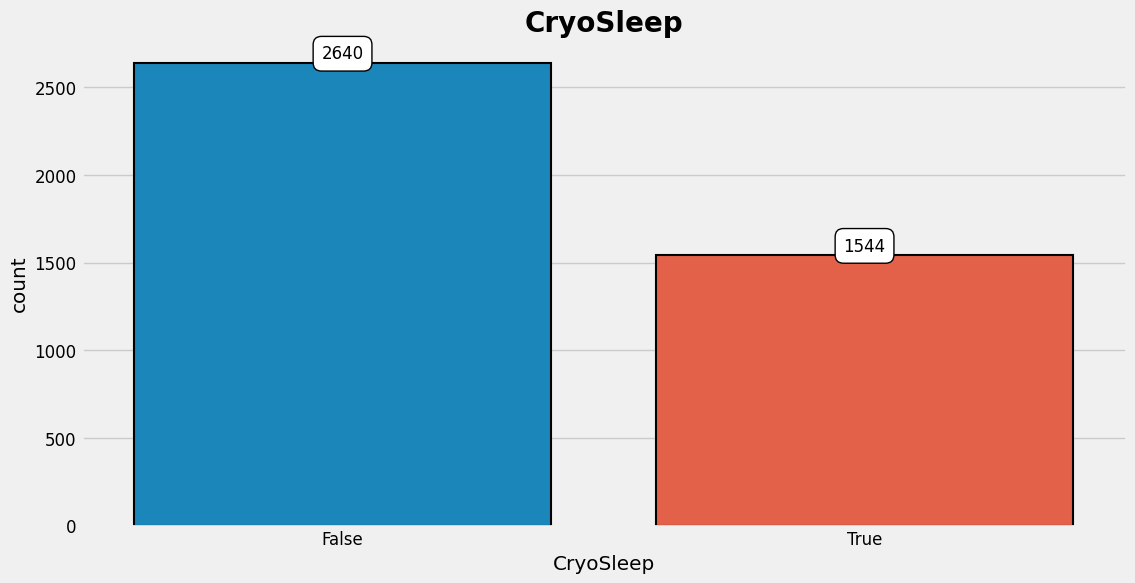

In [134]:
countplot_one_column('CryoSleep', 'CryoSleep')


In [137]:
df_test.loc[df_test['CryoSleep'].isna(), 'CryoSleep'] = df_test.loc[df_test['CryoSleep'].isna(), 'CryoSleep'].fillna(False)


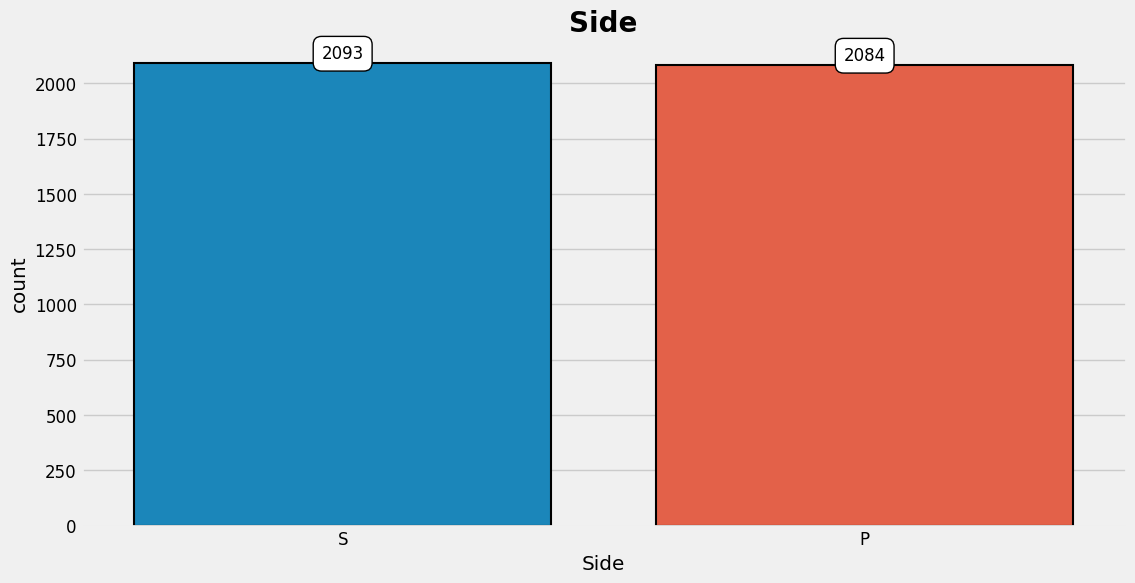

In [139]:
countplot_one_column('Side','Side')


In [140]:
# Calcula las proporciones de pasajeros con "S" y "P"
total_passengers = len(df_test)
count_S = df_test['Side'].value_counts()['S']
count_P = df_test['Side'].value_counts()['P']

proportion_S = count_S / total_passengers
proportion_P = count_P / total_passengers

# Calcula cuántos registros llenar con "S" y cuántos con "P"
num_fill_S = int(proportion_S * 100)  # 100 es el total de registros NaN
num_fill_P = int(proportion_P * 100)

# Llena los valores faltantes con "S" y "P" en función de las cantidades calculadas
df_test.loc[df_test['Side'].isnull()].sample(n=num_fill_S, random_state=42, axis=0)['Side'] = 'S'
df_test.loc[df_test['Side'].isnull(), 'Side'] = 'P'


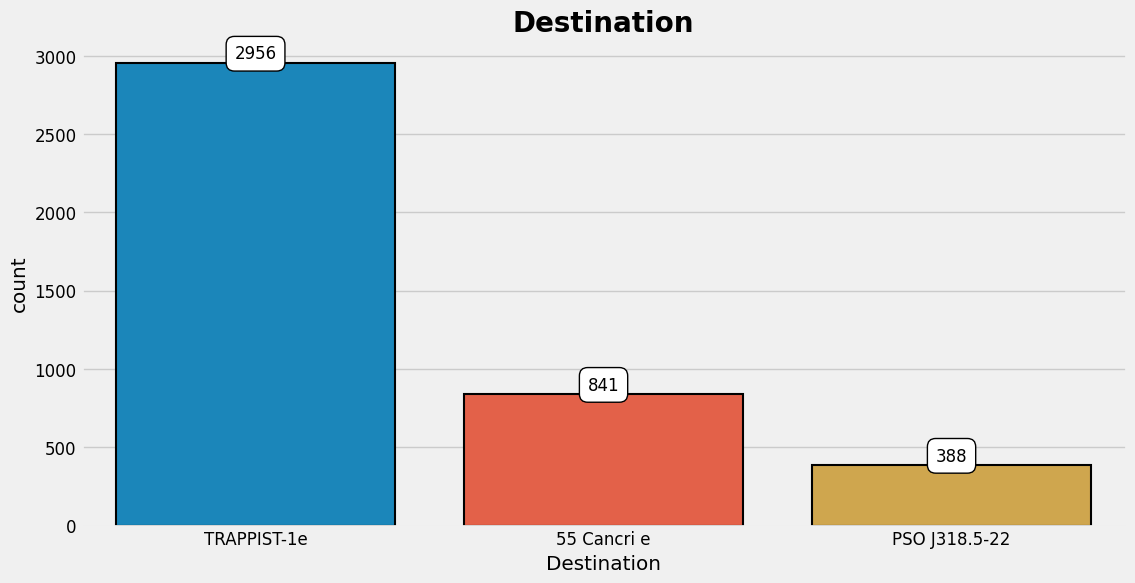

In [152]:
countplot_one_column('Destination', 'Destination')


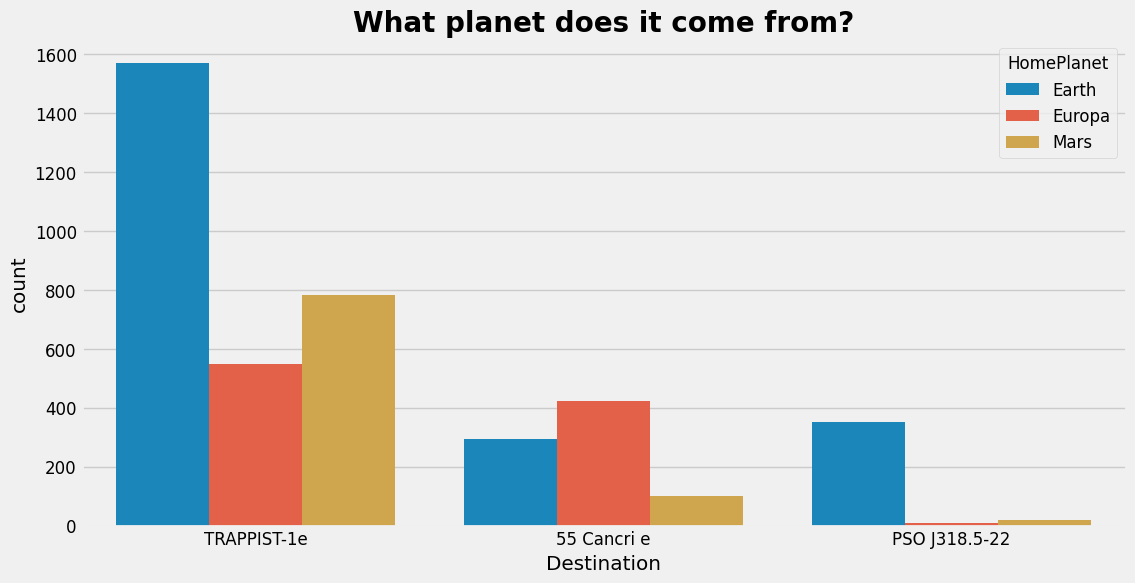

In [153]:
sns.countplot(data = df_test,
              x = 'Destination',
              hue = 'HomePlanet')
plt.title('What planet does it come from?', fontweight = 'bold')
plt.show()

In [161]:
# Calcula las proporciones de DESTINACION de los pasajeros
total_passengers = len(df_test)
count_Trappist = df_test['Destination'].value_counts()['TRAPPIST-1e']
count_Cancri  = df_test['Destination'].value_counts()['55 Cancri e']
count_PSO  = df_test['Destination'].value_counts()['PSO J318.5-22']

proportion_Trappist = count_Trappist / total_passengers
proportion_Cancri = count_Cancri / total_passengers
proportion_PSO = count_PSO / total_passengers

# Calcula cuántos registros llenar con "S" y cuántos con "P"
num_fill_Trappist = int(proportion_Trappist * 100)  # 100 es el total de registros NaN
num_fill_Cancri = int(proportion_Cancri * 100)
num_fill_PSO = int(proportion_PSO * 100)


# Llena los valores faltantes con "S" y "P" en función de las cantidades calculadas
df_test.loc[df_test['Destination'].isnull()].sample(n=num_fill_Trappist, random_state=42, axis=0)['Destination'] = 'TRAPPIST-1e'
df_test.loc[df_test['Destination'].isnull()].sample(n=num_fill_Cancri, random_state=42, axis=0)['Destination'] = '55 Cancri e'
df_test.loc[df_test['Destination'].isnull(), 'Destination'] = 'PSO J318.5-22'


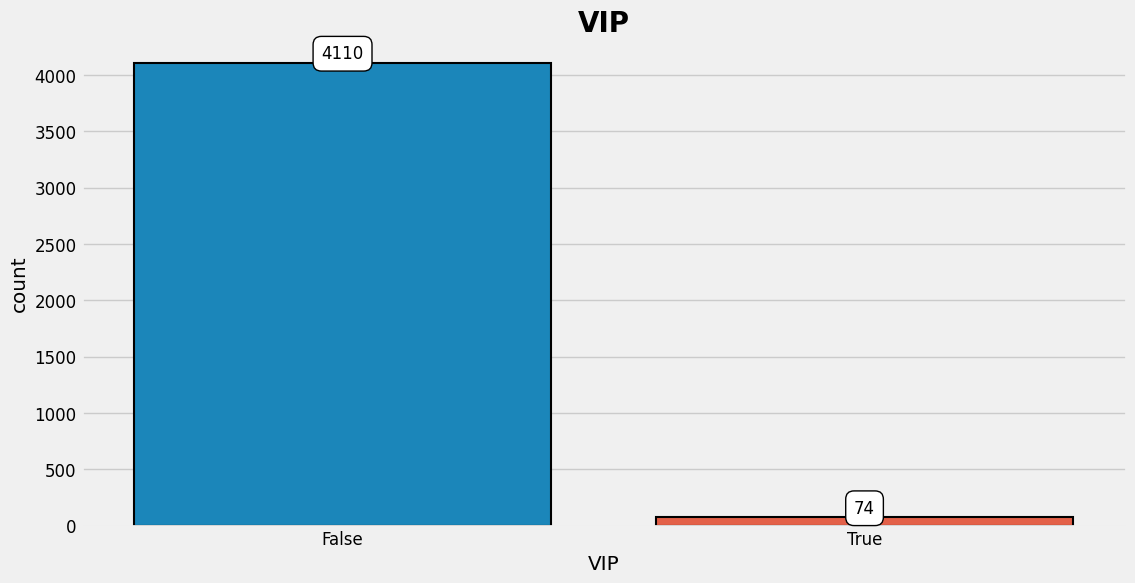

In [163]:
countplot_one_column('VIP', 'VIP')


In [164]:
countplot_one_column('Destination', 'Destination')


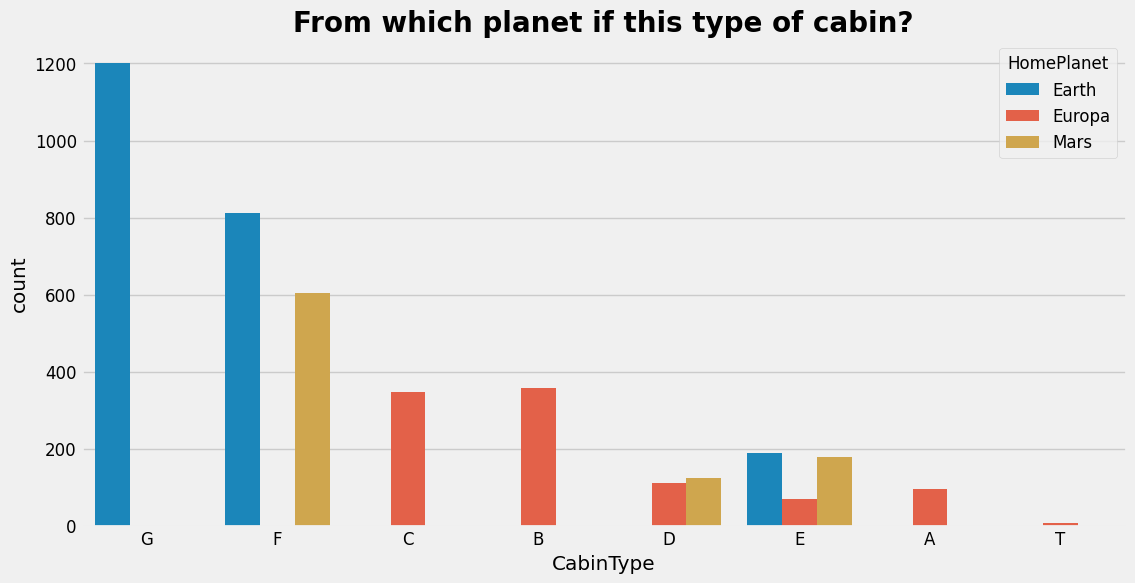

In [166]:
sns.countplot(data = df_test,
              x = 'CabinType',
              hue = 'HomePlanet')
plt.title('From which planet if this type of cabin?', fontweight = 'bold')
plt.show()


In [167]:
def fillnatest_column(columns_nan, column_fill, value, fill):
    df_test.loc[(df_test[columns_nan].isna()) & (df_test[column_fill] == value), columns_nan] = \
    df_test.loc[(df_test[columns_nan].isna()) & (df_test[column_fill] == value), columns_nan].fillna(fill)

In [168]:
fillnatest_column('HomePlanet', 'CabinType', 'B', 'Europa')
fillnatest_column('HomePlanet', 'CabinType', 'F', 'Earth')
fillnatest_column('HomePlanet', 'CabinType', 'A', 'Europa')
fillnatest_column('HomePlanet', 'CabinType', 'G', 'Earth')
fillnatest_column('HomePlanet', 'CabinType', 'E', 'Earth')
fillnatest_column('HomePlanet', 'CabinType', 'D', 'Mars')
fillnatest_column('HomePlanet', 'CabinType', 'C', 'Europa')
fillnatest_column('HomePlanet', 'CabinType', 'T', 'Europa')

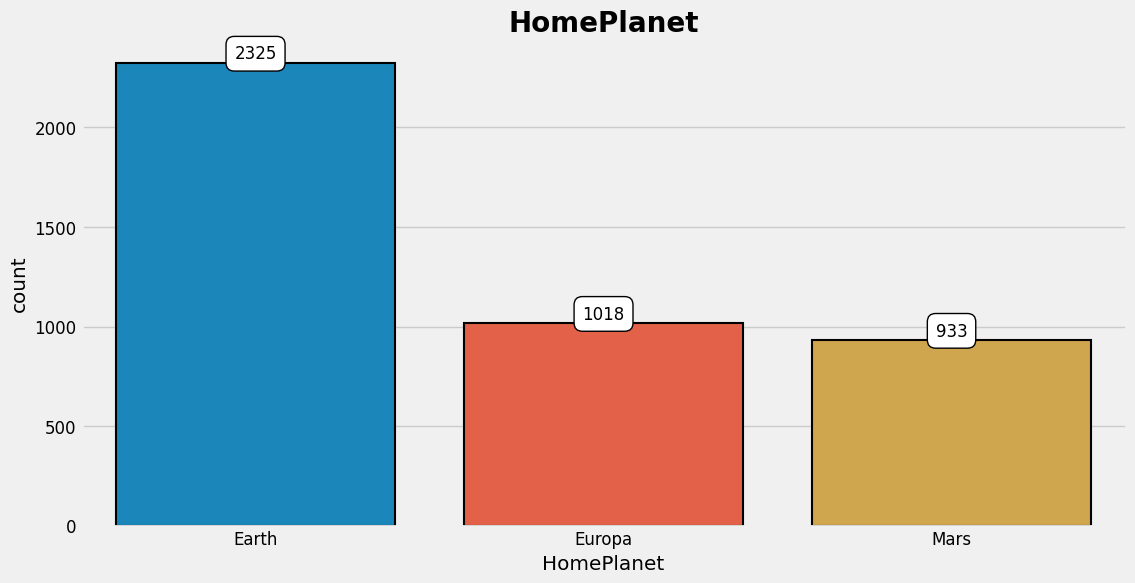

In [170]:
countplot_one_column('HomePlanet', 'HomePlanet')


In [172]:
df_test.loc[df_test['HomePlanet'].isna(), 'HomePlanet'] = df_test.loc[df_test['HomePlanet'].isna(), 'HomePlanet'].fillna("Earth")


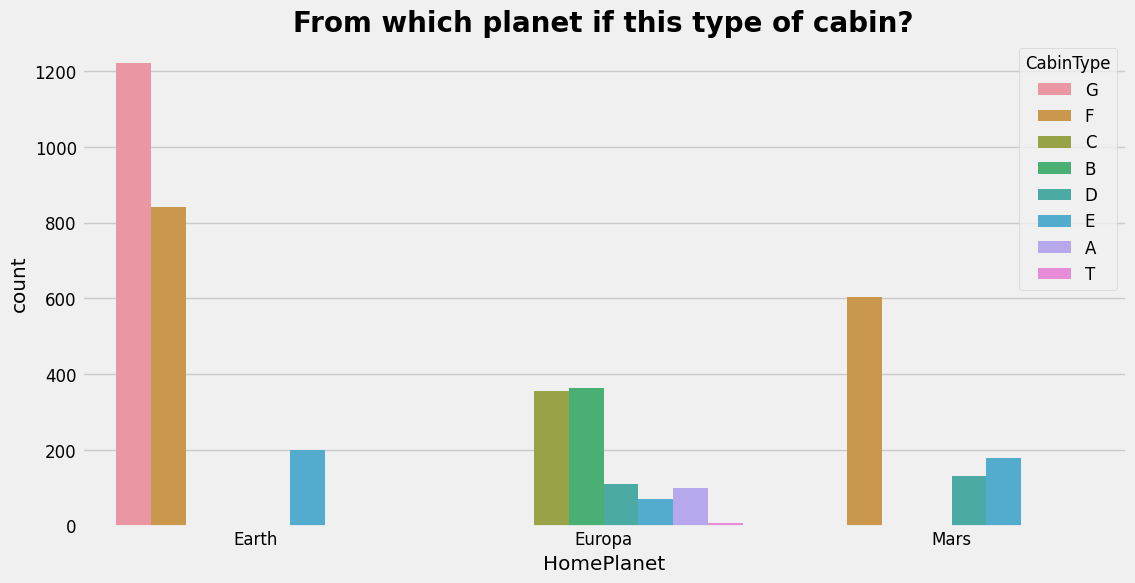

In [175]:
sns.countplot(data = df_test,
              x = 'HomePlanet',
              hue = 'CabinType')
plt.title('From which planet if this type of cabin?', fontweight = 'bold')
plt.show()

In [176]:
fillnatest_column('CabinType', 'HomePlanet', 'Europa', 'B')
fillnatest_column('CabinType', 'HomePlanet', 'Earth', 'G')
fillnatest_column('CabinType', 'HomePlanet', 'Mars', 'F')


In [180]:
df_test = df.drop('NumCabins' , axis = 1)

KeyError: "['NumCabins'] not found in axis"

In [177]:
df_test.isna().sum()


Group              0
NumberInGroup      0
CountGroup         0
HomePlanet         0
CryoSleep          0
CabinType          0
NumCabins        100
Side               0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
dtype: int64